# Goals

1. Predict conversion rate
2. Come up with recomendations to help product and marketing team increase recomendations

# Import standard packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset

In [2]:
df = pd.read_csv('~/Data/conversion_data.csv')
df.head(3)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0


In [3]:
from sklearn.model_selection import train_test_split

### Creating targey verctor

In [4]:
y = df.converted

# What's the empirical conversion rate?

In [17]:
df.shape

(316200, 6)

In [18]:
df['converted'].sum()

10200

### Overall empirical conversion rate

In [19]:
(10200/316200) * 100

3.225806451612903

In [20]:
df.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

## Looking at conversion rates: Country x Source

In [32]:
con_ads_sum = df.pivot_table(index='country', columns = 'source', 
                    aggfunc={'converted':sum})

con_ads_len = df.pivot_table(index='country', columns = 'source', 
                    aggfunc={'converted':len})


In [23]:
print(con_ads_sum)

print(con_ads_len)

        converted             
source        Ads Direct   Seo
country                       
China          32     24    46
Germany       251    153   412
UK            752    515  1283
US           2025   1348  3359
        converted              
source        Ads Direct    Seo
country                        
China       21561  17463  37578
Germany      3760   2864   6432
UK          13518  11131  23801
US          49901  40962  87229


### Actual Conversion Rates

In [25]:
converted_rate = (con_ads_sum / con_ads_len) * 100
converted_rate

converted                    
source        Ads    Direct       Seo
country                              
China    0.148416  0.137433  0.122412
Germany  6.675532  5.342179  6.405473
UK       5.562953  4.626718  5.390530
US       4.058035  3.290855  3.850784

## Distribution of Age Breakdown

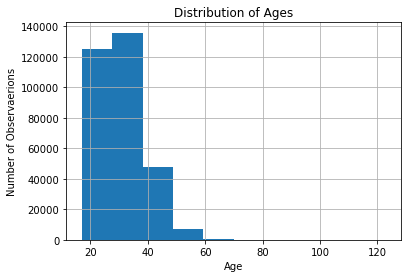

In [61]:
df['age'].hist()
plt.xlabel('Age')
plt.ylabel('Number of Observaerions')
plt.title('Distribution of Ages')

In [28]:
age = pd.cut(df['age'], [0, 20, 30, 40, 50])

## Converstion Rates: Country x Source x Age

In [31]:
df.pivot_table(index='country', columns = ['source', age], 
                    aggfunc={'converted':sum})

converted                                                       \
source        Ads                             Direct                     
age       (0, 20] (20, 30] (30, 40] (40, 50] (0, 20] (20, 30] (30, 40]   
country                                                                  
China           6       22        4        0       6       14        1   
Germany        57      124       62        8      37       80       32   
UK            171      389      165       26     120      272      106   
US            435     1052      447       85     263      702      327   

                                                     
source               Seo                             
age     (40, 50] (0, 20] (20, 30] (30, 40] (40, 50]  
country                                              
China          3       9       24       13        0  
Germany        4      97      205       92       17  
UK            17     281      672      273       53  
US            54     749     1747      728      124

In [34]:
con_sum_age = df.pivot_table(index='country', columns = ['source', age], 
                    aggfunc={'converted':sum})

con_len_age = df.pivot_table(index='country', columns = ['source', age], 
                    aggfunc={'converted':len})

### Actual Rates

In [36]:
converted_rate_age = (con_sum_age / con_len_age) * 100
converted_rate_age

converted                                                     \
source         Ads                                   Direct             
age        (0, 20]  (20, 30]  (30, 40]  (40, 50]    (0, 20]  (20, 30]   
country                                                                 
China     0.255646  0.244363  0.053605  0.000000   0.304414  0.192097   
Germany  12.638581  7.784055  4.912837  1.946472  11.671924  6.482982   
UK       11.430481  6.746445  3.586957  1.763908   9.600000  5.771271   
US        7.693668  5.032770  2.618016  1.530704   5.784033  4.097117   

                                                                      
source                             Seo                                
age      (30, 40]  (40, 50]    (0, 20]  (20, 30]  (30, 40]  (40, 50]  
country                                                               
China    0.016647  0.155844   0.216867  0.153708  0.100947  0.000000  
Germany  3.343783  1.261830  12.967914  7.730015  4.144144  2.344828  
UK       2.759698  1.457976   9.978693  6.768053  3.409943  1.945668  
US       2.326409  1.182654   7.626515  4.792341  2.434294  1.276640

## Barplot to visualize conversion rate by groups

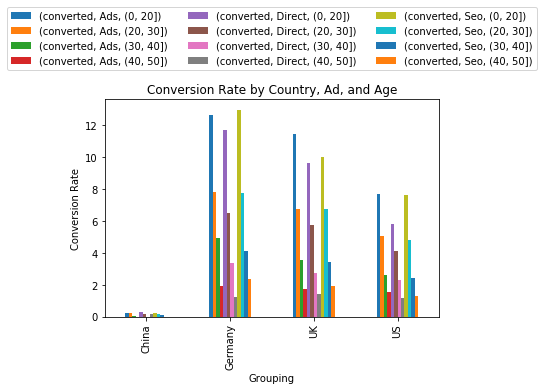

In [40]:
converted_rate_age.plot(kind='bar')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45),
          ncol=3, fancybox=True)
plt.ylabel('Conversion Rate')
plt.xlabel('Grouping')
plt.title('Conversion Rate by Country, Ad, and Age')


For Germany, US, UK, Young people convert at highest rates regardless of source

## Country x Age only

In [44]:
conversion_cont_age_sum = df.pivot_table(index='country', columns = [age], 
                    aggfunc={'converted':sum})

conversion_con_age_len = df.pivot_table(index='country', columns = [age], 
                    aggfunc={'converted':len})

In [45]:
converted_rate_cont_age = (conversion_cont_age_sum / conversion_con_age_len) * 100
converted_rate_cont_age

converted                              
age        (0, 20]  (20, 30]  (30, 40]  (40, 50]
country                                         
China     0.247992  0.188058  0.068319  0.034459
Germany  12.598945  7.464866  4.190133  1.995871
UK       10.284070  6.531752  3.307594  1.789709
US        7.227050  4.699897  2.460843  1.326140

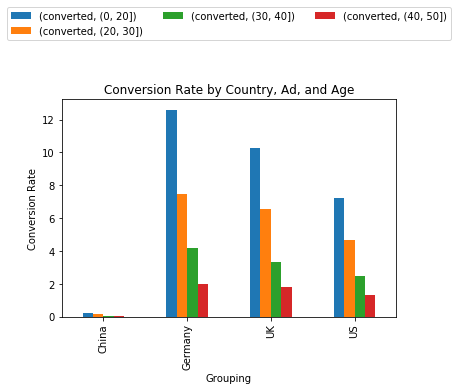

In [46]:
converted_rate_cont_age.plot(kind='bar')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45),
          ncol=3, fancybox=True)
plt.ylabel('Conversion Rate')
plt.xlabel('Grouping')
plt.title('Conversion Rate by Country, Ad, and Age')

## Getting counts per country

In [56]:
country_counts = df.groupby('country').count()
country_counts.iloc[:,1]

country
China       76602
Germany     13056
UK          48450
US         178092
Name: new_user, dtype: int64

## More than half of users are from Germany 

([<matplotlib.patches.Wedge at 0x113f436d8>,
  <matplotlib.text.Text at 0x113f55400>])

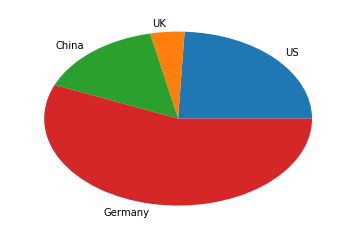

In [59]:
lab = ['US','UK','China','Germany']
plt.pie(country_counts.iloc[:,1],labels = lab)

Half of all users are from Germany, small amount of users from UK

## Getting counts per source

In [62]:
source_counts = df.groupby('source').count()
source_counts.iloc[:,1]

source
Ads        88740
Direct     72420
Seo       155040
Name: age, dtype: int64

In [65]:
labs = ['Ads','Direct','Seo']

## Half of users come in through SEO

([<matplotlib.patches.Wedge at 0x11479cac8>,
  <matplotlib.text.Text at 0x1147a9ba8>])

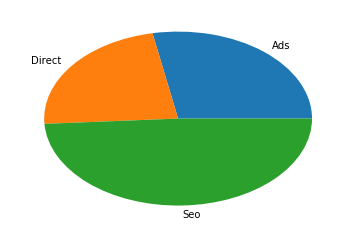

In [66]:
plt.pie(source_counts.iloc[:,1],labels = labs)

In [67]:
conversion_source_sum = df.pivot_table(index='source', 
                    aggfunc={'converted':sum})

conversion_source_len = df.pivot_table(index='source', 
                    aggfunc={'converted':len})

In [68]:
converted_rate_source = (conversion_source_sum / conversion_source_len) * 100
converted_rate_source

,converted
source,
Ads,3.448276
Direct,2.816901
Seo,3.289474


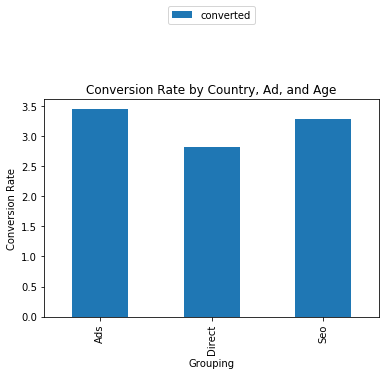

In [69]:
converted_rate_source.plot(kind='bar')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.45),
          ncol=3, fancybox=True)
plt.ylabel('Conversion Rate')
plt.xlabel('Grouping')
plt.title('Conversion Rate by Country, Ad, and Age')

despite half of all users coming in through search engine optimization, there are equal conversion rates among all source categories... might be wasting money here

# Convert categorical variables to dummy variables 

In [5]:
df1 = pd.get_dummies(df)
df1.head(6)

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1
5,31,0,1,0,0,0,0,1,0,0,1


# Drop converted from the feature matrix

In [6]:
X = df1.drop('converted',axis=1)
X.head(4)

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1


In [7]:
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [8]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.984


In [9]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.985
Accuracy on test set: 0.985


In [10]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.          0.05409159  0.90299259  0.04291582  0.          0.          0.
  0.          0.          0.        ]


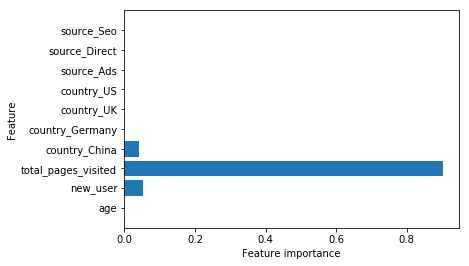

In [11]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=3, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=3, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
forest = RandomForestClassifier(n_estimators=3, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.984


## Feature importance from random forest

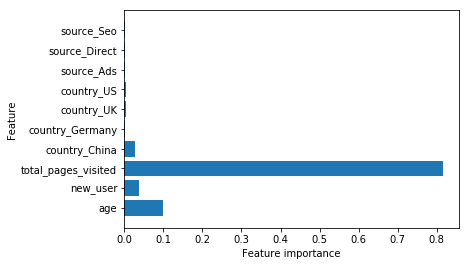

In [14]:
plot_feature_importances(forest)

In [72]:
y_score = y_score = forest.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_score)
con_mat = confusion_matrix(y_test, y_score)


In [79]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [86]:
import itertools

## COnfusion Matrix without normalization

Confusion matrix, without normalization
[[76045   408]
 [  872  1725]]


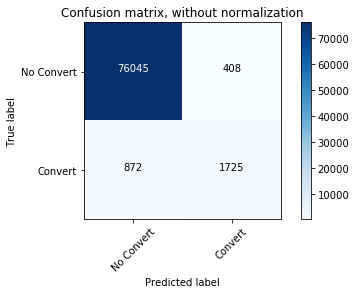

In [89]:
# Plot non-normalized confusion matrix
class_names = ['No Convert','Convert']
plt.figure()
plot_confusion_matrix(con_mat,classes=class_names,
                     title='Confusion matrix, without normalization')


## Confusion Matrix with Normalization

Normalized confusion matrix
[[ 0.99466339  0.00533661]
 [ 0.33577204  0.66422796]]


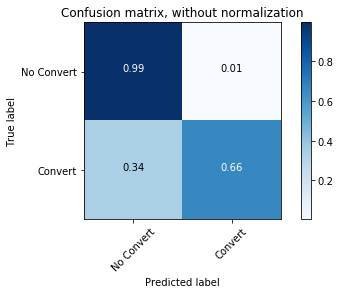

In [90]:
plt.figure()
plot_confusion_matrix(con_mat,classes=class_names,
                      normalize = True,
                     title='Confusion matrix, without normalization')

## Looking at Precision and Recall Score

In [93]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


print("Precision:", precision_score(y_test, y_score))
print("Recall:", recall_score(y_test, y_score))

Precision: 0.808720112518
Recall: 0.664227955333


In [94]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.74


## Precision Recall Curve

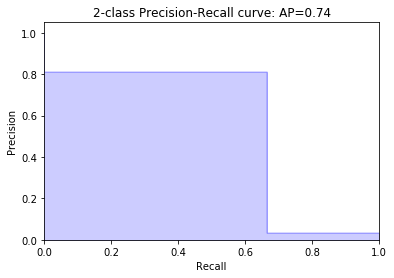

In [74]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

Not sure about this precision recall curve - looks funny to me, would be worth further exploring why

# Conclusions and Recomendations:

1. Get people to stay on the site longer
2. Find out why China converts so much lower and find ways to increase it's conversions
3. Younger people convert at higher rates so figure out how to target adults

# Future Directions

1. The recall is not great, would be nice to try to get that better
2. Only used train test split... would be good to try sampling methods (i.e. oversampling) because there are far fewer converted cases than non-converted
3. Consider models other than Random Forest